In [14]:
import pandas as pd
from functions import *

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [15]:
df = pd.read_csv('../data/sales.csv')
pd.set_option('display.max_columns', None)

#### Clean Dataset

In [16]:
df = df.drop(columns=['True_index', 'Store_ID'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = pd.get_dummies(df, columns=['State_holiday']).drop(columns=['State_holiday_0'])

#### Create Month Variable

In [17]:
#df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
#df['Day'] = df['Date'].apply(lambda x: x.day)
df = df.drop(columns=['Date'])

#### Check Correlation

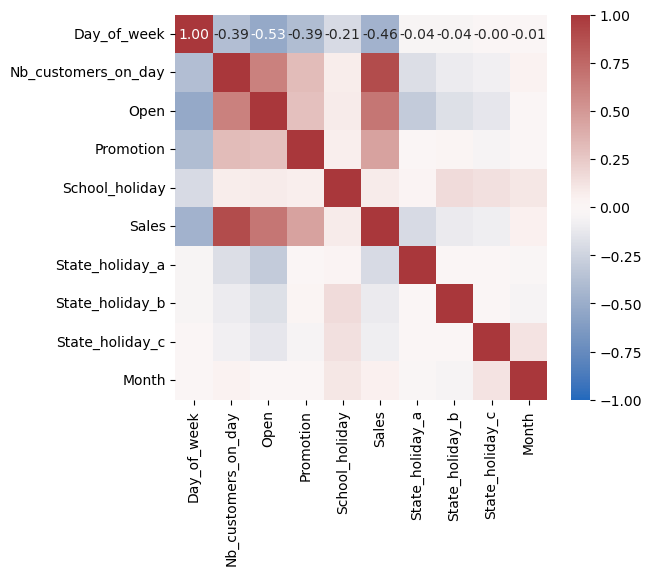

In [18]:
# check for correlation
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(df_corr, annot=True, vmin = -1, vmax = 1, fmt=".2f", cmap='vlag')
plt.show()

#### Prepare Data for Model Testing

In [19]:
# take sample of the data
df = df.sample(n=60000)

In [20]:
features = df.drop(columns=['Sales', 'School_holiday'])
target = df['Sales']

In [21]:
# split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [22]:
# normalize features

from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [23]:
# define model types
models_dict = {
  'RandomForestRegressor': RandomForestRegressor(n_estimators=20, max_depth=7, random_state=42),
  'RandomForestRegressor 2': RandomForestRegressor(n_estimators=20, max_depth=8, random_state=42),
  'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=20, max_depth=8),
  'GradientBoostingRegressor 2': GradientBoostingRegressor(n_estimators=20, max_depth=9),
  'KNeighborsRegressor 2': KNeighborsRegressor(n_neighbors=20),
  'KNeighborsRegressor 3': KNeighborsRegressor(n_neighbors=40)
}

# train and evaluate model types
df_result = model_testing(X_train, X_test, y_train, y_test, models_dict)

Model type: RandomForestRegressor
Model type: RandomForestRegressor 2
Model type: GradientBoostingRegressor
Model type: GradientBoostingRegressor 2
Model type: KNeighborsRegressor 2
Model type: KNeighborsRegressor 3


In [24]:
df_result

,model_type,r2_score,MAE,MSE
0,RandomForestRegressor,0.870757,901.663777,1358.619499
1,RandomForestRegressor 2,0.873017,894.740504,1346.687554
2,GradientBoostingRegressor,0.861129,1023.144954,1408.314195
3,GradientBoostingRegressor 2,0.860653,1024.782511,1410.727062
4,KNeighborsRegressor 2,0.844039,992.058796,1492.456823
5,KNeighborsRegressor 3,0.843497,993.984498,1495.048171


#### Model Training

#### Model Application